In [1]:
file_name='Classifier_202211241900.pth' # 副檔名通常以.pt或.pth儲存，建議使用.pth
import torch
device=torch.device('cuda') # 'cuda'/'cpu'，import torch
num_classes=10 # 物件類別數+1(背景)

In [2]:
# 取得網路
from torch import nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        self.layer2=nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )
        self.layer3=nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=5,stride=1,padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2),
        )        
        self.fc=nn.Linear(3*3*64,num_classes)

    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.layer3(x)
        x=x.view(x.size(0),-1)
        x=self.fc(x)
        return x

classifier=CNN().to(device)
classifier.load_state_dict(torch.load(file_name)) # import torch
classifier.eval()

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=576, out_features=10, bias=True)
)

In [3]:
# 取得影像
from torchvision import transforms,datasets
transforms=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307),(0.3081))]) # 標準化每個channel為均值0.1307、標準差0.3081，import torchvision
dataset=datasets.MNIST('',train=False,download=False,transform=transforms) # ''指資料存放在程式目前的資料夾，train=True時dataset為60000筆訓練資料，其中dataset.data：[60000,28,28]，dataset.targets：[60000]，train=False時dataset為10000筆測試資料，其中dataset.data：[10000,28,28]，dataset.targets：[10000]，import torchvision
test_loader=torch.utils.data.DataLoader(dataset,batch_size=1,shuffle=False) # import torch

actual    : [7]
prediction: [7]
softmax   : [[1.40303691e-09 1.01181854e-07 1.83944782e-09 6.01937984e-08
  2.08477194e-10 1.06843145e-09 4.62213059e-13 9.99999642e-01
  1.14332641e-10 1.38453331e-07]]


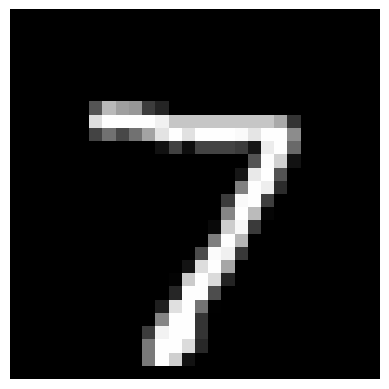

actual    : [2]
prediction: [2]
softmax   : [[3.3253003e-05 1.6146025e-05 9.9994814e-01 2.5197889e-07 5.8111018e-09
  5.7507062e-11 2.1515818e-06 6.4832633e-08 6.6258625e-09 4.9662252e-09]]


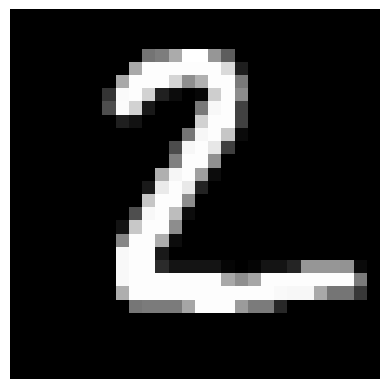

actual    : [1]
prediction: [1]
softmax   : [[1.8013850e-07 9.9997640e-01 3.6016726e-07 1.1438922e-08 1.6048934e-05
  1.8003581e-07 2.5161359e-07 6.3935859e-06 2.7420873e-08 1.2828761e-08]]


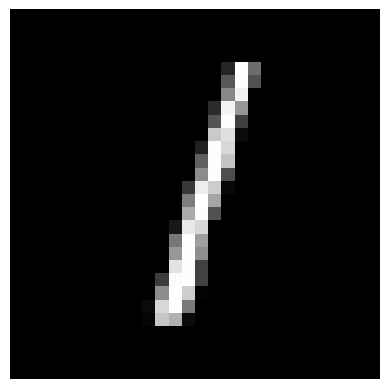

actual    : [0]
prediction: [0]
softmax   : [[9.9999738e-01 1.3260949e-09 2.9841036e-07 5.4329063e-10 1.0296973e-09
  3.2983593e-08 2.1733917e-06 6.7635577e-09 4.2148107e-09 3.2048344e-08]]


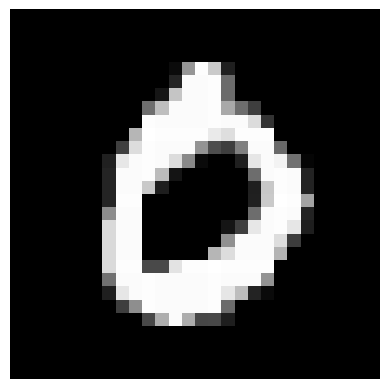

actual    : [4]
prediction: [4]
softmax   : [[7.8551192e-09 2.6899643e-06 4.2338346e-09 3.7466277e-10 9.9998796e-01
  8.7490442e-08 3.5268382e-08 1.7928913e-07 1.6372597e-08 9.0290850e-06]]


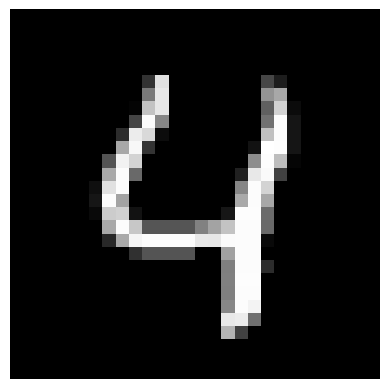

actual    : [1]
prediction: [1]
softmax   : [[2.7688923e-08 9.9999595e-01 1.4109329e-08 2.0946782e-09 1.9015046e-06
  3.6126373e-09 2.4630328e-08 2.0514724e-06 2.9506992e-08 7.8831590e-09]]


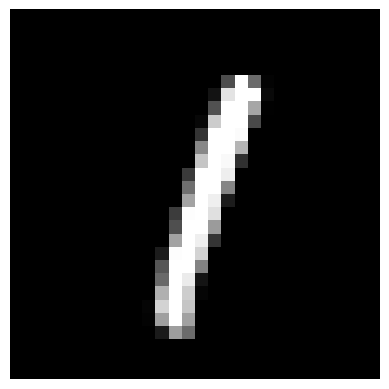

actual    : [4]
prediction: [4]
softmax   : [[9.9676177e-11 1.0373465e-06 4.7195883e-08 6.0273042e-10 9.9999452e-01
  1.4360593e-07 3.7683069e-08 4.3262176e-07 8.3241918e-07 2.9353093e-06]]


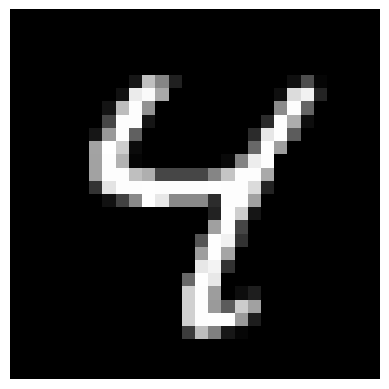

actual    : [9]
prediction: [9]
softmax   : [[1.6748932e-07 1.5223732e-07 2.1252339e-05 2.6211293e-07 2.6563916e-06
  3.9387778e-08 2.9354192e-09 8.1395335e-08 1.3480585e-05 9.9996197e-01]]


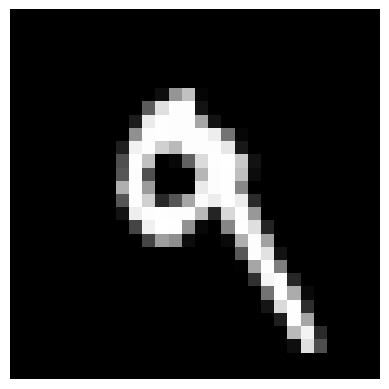

actual    : [5]
prediction: [5]
softmax   : [[2.3926233e-07 8.3378895e-09 1.2138214e-06 1.9347196e-07 1.7633531e-06
  6.3306123e-01 3.6688039e-01 4.9693557e-07 5.4347875e-05 1.0564057e-07]]


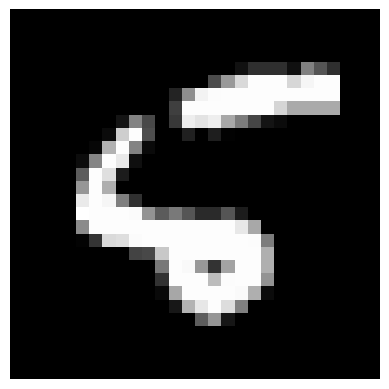

actual    : [9]
prediction: [9]
softmax   : [[4.4882777e-09 7.9459460e-11 1.7015609e-09 4.4222156e-10 1.3361076e-06
  6.1269021e-09 6.0413140e-11 4.5975728e-05 9.8698013e-07 9.9995160e-01]]


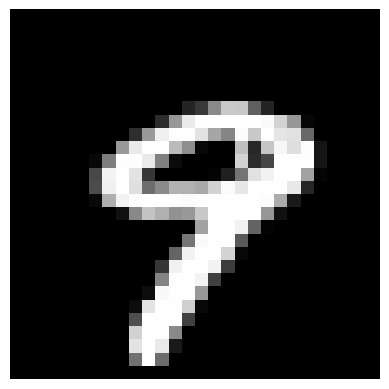

In [4]:
import matplotlib.pyplot as plt
for index,(img,cls) in enumerate(test_loader): # img：[batch_size,1,28,28]，cls：[batch_size]
    img,cls=img.to(device),cls.to(device)
    pred=classifier(img) # pred：[batch_size,num_classes]
    output_id=torch.max(pred,dim=1)[1] # output_id：網路輸出編號(0表示預測為第一個輸出)，[batch_size]
    print('actual    :',cls.cpu().numpy())
    print('prediction:',output_id.cpu().numpy())
    print('softmax   :',torch.softmax(pred,dim=1).cpu().detach().numpy())
    plt.imshow(dataset.data[index],cmap='gray') # 繪製點陣圖，cmap='gray'：灰階
    plt.axis('off') # 隱藏刻度
    plt.show()
    index+=1
    if(index==10):
        break